#Regression Analysis
<img src="https://www.scotsman.com/webimg/b25lY21zOjNlZTc5NjRlLWFkOTctNDY1My1iYTg1LTQ2OWM5Yjg4MzdmMTozMmE0MzBmMy1jNTBjLTQ3MTItODRlNy1lODE3NzkzZWQ3N2I=.jpg" >

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

In [14]:
from zipfile import ZipFile
file_name="archive.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')


done


In [16]:
import pandas as pd

# Replace 'filename.csv' with the name of your CSV file
file_path = '/content/haunted_places.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

      city        country                                        description  \
0      Ada  United States  Ada witch - Sometimes you can see a misty blue...   
1  Addison  United States  A little girl was killed suddenly while waitin...   
2   Adrian  United States  If you take Gorman Rd. west towards Sand Creek...   
3   Adrian  United States  In the 1970's, one room, room 211, in the old ...   
4   Albion  United States  Kappa Delta Sorority - The Kappa Delta Sororit...   

                   location     state state_abbrev  longitude   latitude  \
0              Ada Cemetery  Michigan           MI -85.504893  42.962106   
1           North Adams Rd.  Michigan           MI -84.381843  41.971425   
2             Ghost Trestle  Michigan           MI -84.035656  41.904538   
3  Siena Heights University  Michigan           MI -84.017565  41.905712   
4            Albion College  Michigan           MI -84.745177  42.244006   

   city_longitude  city_latitude  
0      -85.495480      42.9

#EDA

In [19]:
df

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097
...,...,...,...,...,...,...,...,...,...,...
10987,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.048936,39.862610,-105.037205,39.836653
10988,Westminster,United States,Is haunted by the victims of a murder that hap...,Pillar of Fire,Colorado,CO,-105.032091,39.847237,-105.037205,39.836653
10989,Wheat Ridge,United States,The institution was for kids 18 years old and ...,Ridge Mental Institution,Colorado,CO,-105.063974,39.769726,-105.077206,39.766098
10990,Wheat Ridge,United States,Gymnasium - their have been reports of a litt...,Wheat Ridge Middle School,Colorado,CO,-105.103613,39.764055,-105.077206,39.766098


In [18]:
df.info()#to check data type, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   state           10992 non-null  object 
 5   state_abbrev    10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 858.9+ KB


In [20]:
df.drop(columns=['longitude','latitude'],inplace=True)#if we run this multiple times, we will get an error as the data has been removed once

In [23]:
df

,city,country,description,location,state,state_abbrev,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.753030,42.243097
...,...,...,...,...,...,...,...,...
10987,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.037205,39.836653
10988,Westminster,United States,Is haunted by the victims of a murder that hap...,Pillar of Fire,Colorado,CO,-105.037205,39.836653
10989,Wheat Ridge,United States,The institution was for kids 18 years old and ...,Ridge Mental Institution,Colorado,CO,-105.077206,39.766098
10990,Wheat Ridge,United States,Gymnasium - their have been reports of a litt...,Wheat Ridge Middle School,Colorado,CO,-105.077206,39.766098


In [26]:
df.dropna(inplace=True)#drop rows
df.reset_index(drop=True,inplace=True)

In [27]:
df.country.unique()

AttributeError: 'DataFrame' object has no attribute 'country'

In [24]:
df.drop(columns=['country',"state_abbrev"],inplace=True)

In [28]:
df.head()

,city,description,location,state,city_longitude,city_latitude
0,Ada,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,-85.495480,42.960727
1,Addison,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,-84.347168,41.986434
2,Adrian,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,-84.037166,41.897547
3,Adrian,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,-84.037166,41.897547
4,Albion,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,-84.753030,42.243097


In [30]:
url_usa='https://raw.githubusercontent.com/PublicaMundi/MappingAPI/refs/heads/master/data/geojson/us-states.json'

In [31]:
usa=gpd.read_file(url_usa)

In [32]:
df.state.unique()

array(['Michigan', 'Pennsylvania', 'California', 'Massachusetts',
       'Arkansas', 'Oregon', 'Arizona', 'Maryland', 'Oklahoma', 'Maine',
       'Alaska', 'Louisiana', 'Alabama', 'Ohio', 'New Jersey',
       'Washington DC', 'North Dakota', 'Wyoming', 'North Carolina',
       'Kentucky', 'Kansas', 'New York', 'Wisconsin', 'Iowa',
       'West Virginia', 'New Mexico', 'Washington', 'Illinois', 'Indiana',
       'Virginia', 'Idaho', 'New Hampshire', 'Vermont', 'Nevada',
       'Hawaii', 'Utah', 'Nebraska', 'Georgia', 'Texas', 'Montana',
       'Tennessee', 'Florida', 'Missouri', 'Delaware', 'South Dakota',
       'Mississippi', 'Connecticut', 'Minnesota', 'South Carolina',
       'Rhode Island', 'Colorado'], dtype=object)

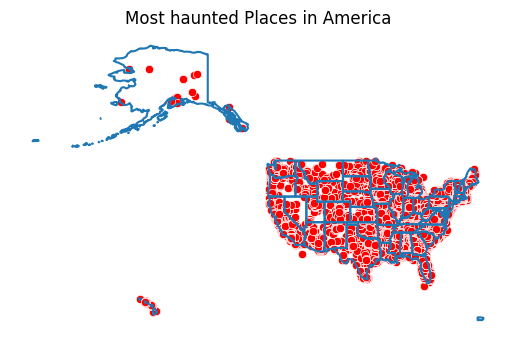

In [33]:
fig,axs=plt.subplots()
sns.scatterplot(data=df,x="city_longitude",y="city_latitude",color="Red")
usa.boundary.plot(ax=axs)
axs.axis("off")
plt.title("Most haunted Places in America")
plt.show()

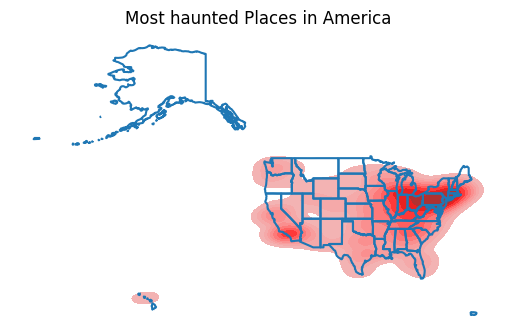

In [34]:
fig,axs=plt.subplots()
sns.kdeplot(data=df,x="city_longitude",y="city_latitude",color="Red",fill=True)
usa.boundary.plot(ax=axs)
axs.axis("off")
plt.title("Most haunted Places in America")
plt.show()

In [37]:
df.head()

,city,description,location,state,city_longitude,city_latitude
0,Ada,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,-85.495480,42.960727
1,Addison,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,-84.347168,41.986434
2,Adrian,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,-84.037166,41.897547
3,Adrian,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,-84.037166,41.897547
4,Albion,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,-84.753030,42.243097


In [38]:
df.description[0]

'Ada witch - Sometimes you can see a misty blue figure floating within a 3-mile radius of the Ada Cemetery on 2 Mile between Egypt Valley and Honey Creek. The story of her origin is as follows: A man suspected his wife of having an affair, so he followed her late one night when she thought he was asleep. Sure enough, she went to a field near their property where she met her lover. The husband was enraged and killed his wife, which resulted in a struggle with the other man. Both men died from their injuries. It is said that late at night (especially during the night of and the nights preceding a full moon) people driving by the field can see her ghost, searching for her lover. Some people have reported stopping to try to communicate with her, but she always disappears or runs into the woods where she cannot be followed (due to the thick brambles that inhabit the area). She is said to dress in a long white gown which authorities say dates her to the turn of the 20th century. Usually she 

In [ ]:
df.description[3]

#https://docs.python.org/3/howto/regex.html
it is like a language inside another language,
it is like a way to analyse strings.Escape charaters are a combination of a few characters
Also starting NLP

In [6]:
my_text="In 2024 the quick brown fox jumps over the lazy dog and the dog didnt like it"

here the output tells us that we have an re object with a positive match on the search that we did. It is searching for one digit and not a combination.

In [7]:
import re
re.search("\d",my_text)

<re.Match object; span=(3, 4), match='2'>

In [8]:
bool(re.search("\d",my_text)) # this is for a true false value

True

In [9]:
re.search("\d{4}",my_text)#providing a set of curly brackets, we will see a year is returned

<re.Match object; span=(3, 7), match='2024'>

In [39]:
year=[]
for n in range(df.shape[0]):
  output=re.findall('\d{4}',df.description[n])
  year.append(output)
year


[[],
 [],
 [],
 ['1970'],
 [],
 [],
 ['1800'],
 ['1800', '1800'],
 [],
 [],
 ['2007'],
 [],
 [],
 [],
 [],
 ['1800'],
 ['2008'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['2001'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['1920'],
 ['2003', '2004'],
 ['2005'],
 [],
 ['1994', '1936'],
 [],
 [],
 [],
 ['1600'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['1903'],
 [],
 ['2003'],
 [],
 [],
 ['1800'],
 ['1924', '1900', '1979'],
 [],
 ['1923', '1902'],
 [],
 [],
 ['2007'],
 [],
 [],
 [],
 [],
 ['1985', '1837'],
 [],
 [],
 ['1800'],
 ['1800'],
 [],
 [],
 [],
 [],
 ['1800'],
 [],
 [],
 [],
 ['1970'],
 [],
 ['1800'],
 [],
 ['2006'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['2002'],
 [],
 ['1879', '2004', '1879'],
 [],
 [],
 [],
 [],
 ['1912'],
 ['1944'],
 [],
 ['1926'],
 [],
 [],
 [],
 [],
 [],
 ['2007'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['1975'],
 [],
 [],
 [],
 [],
 ['1920'],
 [],
 ['1946'],
 [],
 [],
 ['1800'],
 ['1800'],
 ['2007'],
 

In [40]:
year=[]
for n in range(df.shape[0]):
  output=re.findall('\d{4}',df.description[n])
  output=np.array(output,dtype=int)
  if len(output)==0:
    year.append(np.nan)
  else:
    year.append(output.min())
year

  #search just stops when it finds the first value that matches the description
  #find all - continue searching on the strings and gives us all the positive results

[nan,
 nan,
 nan,
 1970,
 nan,
 nan,
 1800,
 1800,
 nan,
 nan,
 2007,
 nan,
 nan,
 nan,
 nan,
 1800,
 2008,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2001,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1920,
 2003,
 2005,
 nan,
 1936,
 nan,
 nan,
 nan,
 1600,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1903,
 nan,
 2003,
 nan,
 nan,
 1800,
 1900,
 nan,
 1902,
 nan,
 nan,
 2007,
 nan,
 nan,
 nan,
 nan,
 1837,
 nan,
 nan,
 1800,
 1800,
 nan,
 nan,
 nan,
 nan,
 1800,
 nan,
 nan,
 nan,
 1970,
 nan,
 1800,
 nan,
 2006,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2002,
 nan,
 1879,
 nan,
 nan,
 nan,
 nan,
 1912,
 1944,
 nan,
 1926,
 nan,
 nan,
 nan,
 nan,
 nan,
 2007,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1975,
 nan,
 nan,
 nan,
 nan,
 1920,
 nan,
 1946,
 nan,
 nan,
 1800,
 1800,
 2007,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1953,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1800,
 nan,
 nan,
 

In [41]:
df["year"]=year

In [42]:
df.head()

,city,description,location,state,city_longitude,city_latitude,year
0,Ada,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,-85.495480,42.960727,NaN
1,Addison,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,-84.347168,41.986434,NaN
2,Adrian,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,-84.037166,41.897547,NaN
3,Adrian,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,-84.037166,41.897547,1970.0
4,Albion,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,-84.753030,42.243097,NaN


In [43]:
df.shape

(10960, 7)

In [44]:
df[df.year.isna()].shape#observations without the year

(8612, 7)

In [45]:
df2=df[df.year.isna()]
df1=df[df.year.isna()==False]
df1=df[df.year.isna()!=True]
df1=df[~df.year.isna()]

In [46]:
df1.shape

(2348, 7)

In [47]:
df1.reset_index(drop=True,inplace=True)

In [48]:
df1.description[0]

"In the 1970's, one room, room 211, in the old section of the dorms exhibited several phenomena. Don't know if this still continues today. The door into the room from the hallway, as well as the door into the bathroom, would open and shut on their own, the main door even if it had been locked. After closing, it would be locked again. There was also a spot on one wall (a wall that the room shared with a boarded up, no longer used laundry shaft) where two points of light would appear, shaped similar to eyes. Attempts were made to explain their appearance (they were visible any time it was dark in the room). They were screened off from the windows to see if they might be reflections, they weren't. When objects were placed between them and the windows they actually became brighter. We tried painting the walls, putting several coats of paint over them (thinking they may have been a joke of a previous resident, made with glow in the dark paint) - also having used sandpaper on the wall in tha

In NLP, remove the special charaters and then make everythign in lower case and finally, remove the numbers as they will not contribute to the analysis

In [49]:
for word in df1.description[0].split():
  print(word, end=" ")#everytime a character is printer, a blank space is added if split is not added.When Split is added, everytime a blank space is encountered , a new word is acknowledged and break line will be done

In the 1970's, one room, room 211, in the old section of the dorms exhibited several phenomena. Don't know if this still continues today. The door into the room from the hallway, as well as the door into the bathroom, would open and shut on their own, the main door even if it had been locked. After closing, it would be locked again. There was also a spot on one wall (a wall that the room shared with a boarded up, no longer used laundry shaft) where two points of light would appear, shaped similar to eyes. Attempts were made to explain their appearance (they were visible any time it was dark in the room). They were screened off from the windows to see if they might be reflections, they weren't. When objects were placed between them and the windows they actually became brighter. We tried painting the walls, putting several coats of paint over them (thinking they may have been a joke of a previous resident, made with glow in the dark paint) - also having used sandpaper on the wall in that

In [50]:
for word in df1.description[0].split():
  if bool (re.search("\d",word))==False:
    print(word.lower(), end=" ")#for words in lower case


in the one room, room in the old section of the dorms exhibited several phenomena. don't know if this still continues today. the door into the room from the hallway, as well as the door into the bathroom, would open and shut on their own, the main door even if it had been locked. after closing, it would be locked again. there was also a spot on one wall (a wall that the room shared with a boarded up, no longer used laundry shaft) where two points of light would appear, shaped similar to eyes. attempts were made to explain their appearance (they were visible any time it was dark in the room). they were screened off from the windows to see if they might be reflections, they weren't. when objects were placed between them and the windows they actually became brighter. we tried painting the walls, putting several coats of paint over them (thinking they may have been a joke of a previous resident, made with glow in the dark paint) - also having used sandpaper on the wall in that spot first b

In [51]:
def remove_numbers(text):
  return" ".join([word for word in text.split()if bool(re.search("\d",word))==False])#we can join all the words that we have on a list

In [52]:
df1['description2']=df1.description.apply(lambda x: x.lower())
df1['description2']=df1.description2.apply(remove_numbers)

In [53]:
df.head()

,city,description,location,state,city_longitude,city_latitude,year
0,Ada,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,-85.495480,42.960727,NaN
1,Addison,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,-84.347168,41.986434,NaN
2,Adrian,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,-84.037166,41.897547,NaN
3,Adrian,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,-84.037166,41.897547,1970.0
4,Albion,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,-84.753030,42.243097,NaN


In [54]:
corpus=df1.description2.to_list()
type(corpus)

list

In [55]:
corpus=' '.join(corpus)
type(corpus)

str

In [56]:
len(corpus)

1367961

#for NLP, familiarize with NLTK, we can use spaCy

In [58]:
import spacy
from spacy.lang.en import stop_words
stop_words=stop_words.STOP_WORDS
print(stop_words)

{'not', 'per', 'make', 'five', 'the', '‘re', 'what', 'go', 'my', '‘d', 'towards', 'around', 'too', 'their', 'thus', 'own', 'hence', 'herein', 'through', 'n‘t', 'amount', 'every', 'whereas', 'whence', 'wherein', 'many', 'front', 'below', 'whose', 'no', 'above', 'behind', 'ours', 'otherwise', 'others', 'its', 'only', 'everywhere', 'of', 'seems', 'themselves', 'hundred', 'say', 'nevertheless', 'which', 'really', "'d", 'hereby', 'nobody', 'eight', 'name', 'is', 'get', 'another', 'am', 'made', 'do', 'to', 'top', 'him', 'other', 'after', 'eleven', 'namely', 'they', 'along', 'part', 'among', 'moreover', 'next', '’d', 'then', 'twenty', 'four', 'sixty', 'these', 'put', 'seeming', 'due', 'though', 'sometime', 'if', 'thereby', 'take', 'call', 'ever', 'once', 'anyone', 'she', 'over', 'we', 'becomes', 'done', 'yet', 'in', 'are', 'side', 'or', 'serious', 'yours', 'within', 'although', 'became', 'a', 'since', 'keep', 'ten', 'does', 'will', 'did', '‘ve', 'besides', 'just', 'afterwards', 'under', 'when

In [59]:
my_text

'In 2024 the quick brown fox jumps over the lazy dog and the dog didnt like it'

In [62]:
nlp=spacy.load("en_core_web_sm")#english,core elements, from the web

In [64]:
doc=nlp(my_text)
doc

In 2024 the quick brown fox jumps over the lazy dog and the dog didnt like it

In [65]:
type(doc)#when we have a sentence like this one, the job of NLP is to convert words to numbers, called token
#when a word repeats, the token count is increased by 1, a new token is not assigned

spacy.tokens.doc.Doc

In [66]:
for word in doc:
  print(word.lemma_,end=" ")#read about lemmatization

in 2024 the quick brown fox jump over the lazy dog and the dog do not like it 

<img src='https://d2mk45aasx86xg.cloudfront.net/Example_to_understand_lemmatization_11zon_000b43c193.webp' >



<img src= 'https://sep.com/wp-content/uploads/2020/12/2020-07-bagofwords.jpg'>

In [67]:
nlp.max_length=len(corpus)
doc=nlp(corpus)

In [100]:
my_stop_words=["build","year","use"]
bow={}

for word in doc:
  if (word.lemma_ not in stop_words)&(len(word.lemma_)>=3)&(word.lemma_ not in my_stop_words):#if word is not a part of the dictionary and the len is more than 3
    try:
      bow[word.lemma_]+=1
    except:
      bow[word.lemma_]=1


In [101]:
print(list(bow.keys())[:10])

['room', 'old', 'section', 'dorm', 'exhibit', 'phenomenon', 'know', 'continue', 'today', 'door']


In [102]:
len(bow)

9450

In [103]:
df_bow=pd.DataFrame({"Tokens":bow.keys(),"Freq":bow.values()})
df_bow

,Tokens,Freq
0,room,821
1,old,985
2,section,35
3,dorm,96
4,exhibit,5
...,...,...
9445,migrant,1
9446,aforementioned,1
9447,uncommonly,1
9448,cloister,1


In [104]:
df_bow.sort_values("Freq",ascending=False).head(10)
df_bow

,Tokens,Freq
0,room,821
1,old,985
2,section,35
3,dorm,96
4,exhibit,5
...,...,...
9445,migrant,1
9446,aforementioned,1
9447,uncommonly,1
9448,cloister,1


In [105]:
top_50=df_bow.sort_values("Freq",ascending=False).head(50).reset_index(drop=True)

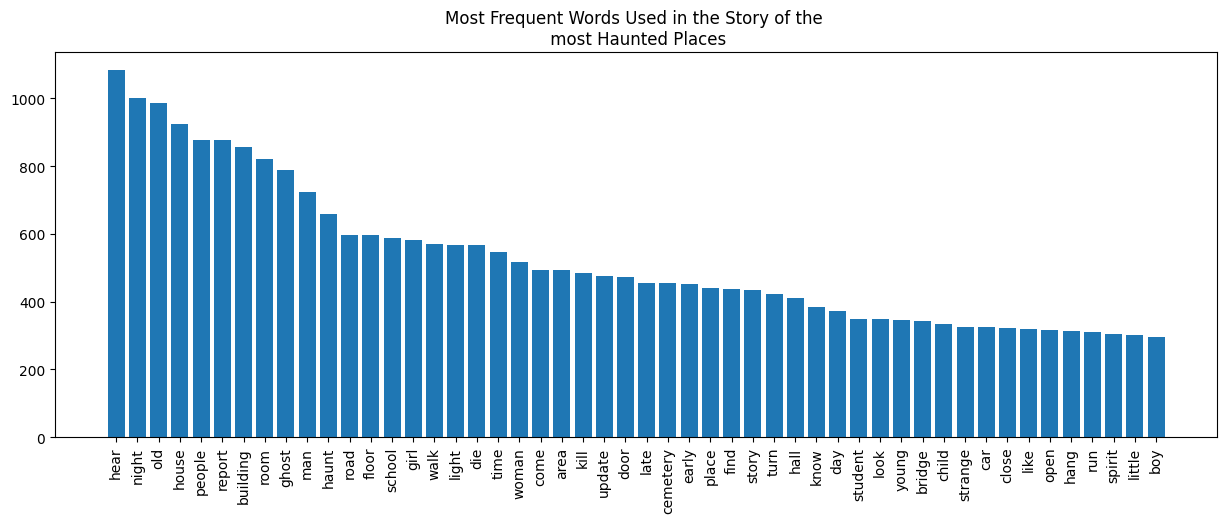

In [106]:
fig,axs=plt.subplots(figsize=(15,5))
axs.bar(top_50.Tokens,top_50.Freq)
plt.title("Most Frequent Words Used in the Story of the \n most Haunted Places")
plt.xticks(rotation=90)
plt.show()

In [107]:
zeros = np.zeros((2,2))
zeros


array([[0., 0.],
       [0., 0.]])

In [108]:
df1.reset_index(drop=True, inplace=True)

In [109]:
zeros = np.zeros((df1.shape[0],50))
df_tags=pd.DataFrame(zeros,columns=top_50.Tokens)
for i in range(df_tags.shape[0]):
  for j in range(df_tags.shape[1]):
    if top_50.Tokens[j] in df1.description2.values[i]:
      df_tags.iloc[i,j]=1
df_tags.head()



Tokens,hear,night,old,house,people,report,building,room,ghost,man,...,strange,car,close,like,open,hang,run,spirit,little,boy
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


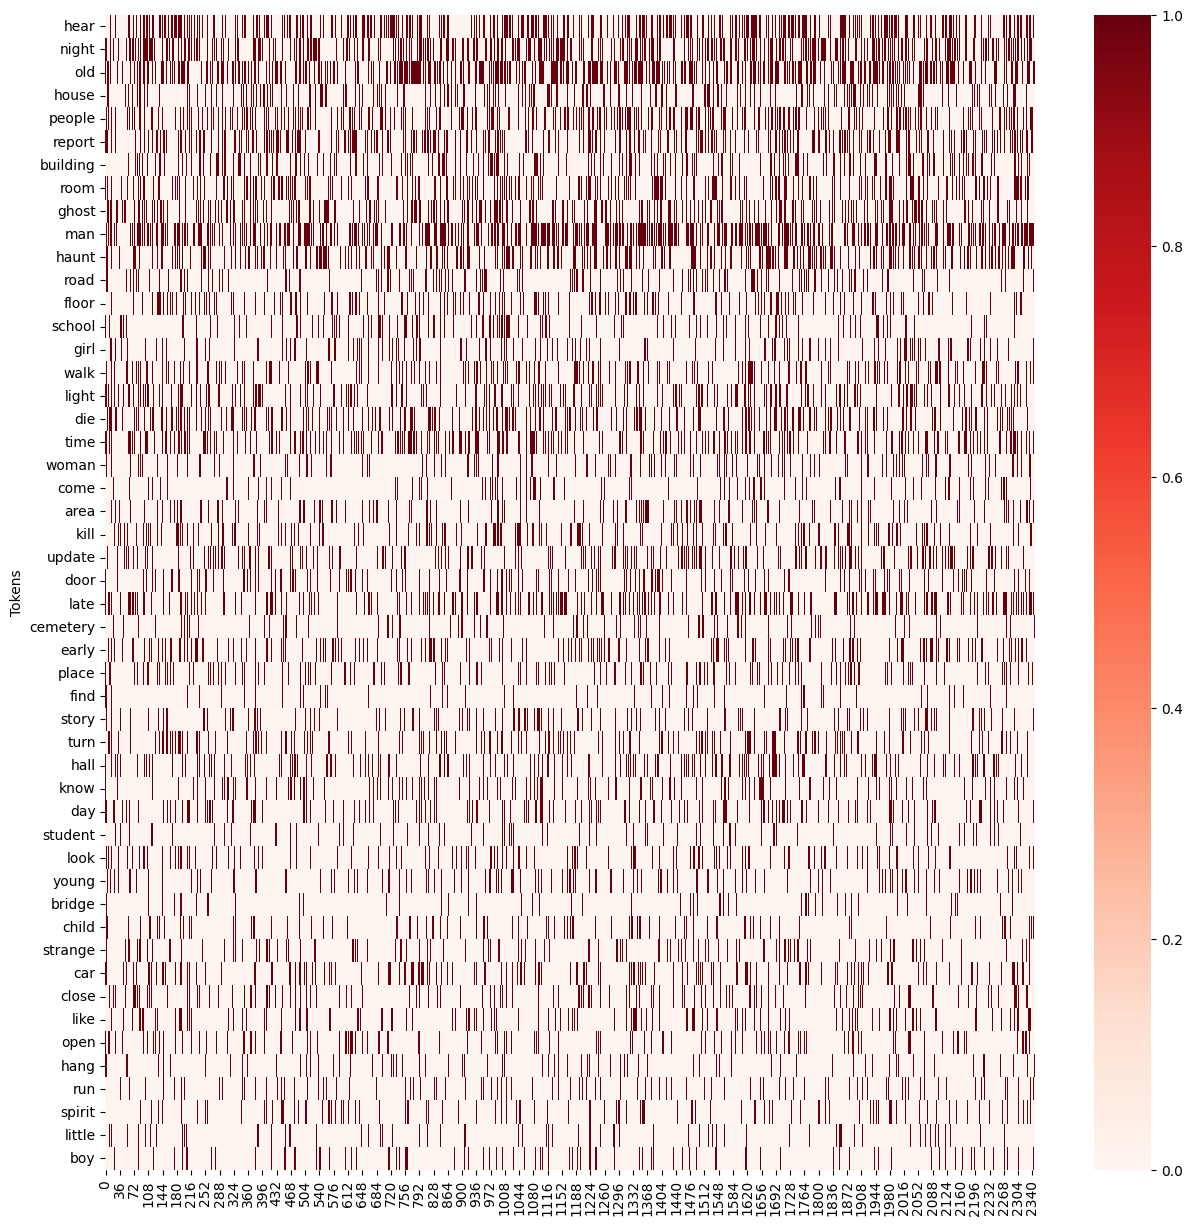

In [110]:
fig , axs=plt.subplots(figsize=(15,15))
sns.heatmap(df_tags.T,cmap="Reds",ax=axs)
plt.show()

In the above, we can see the different stories on the x-axis. we can see the word hear has been used multiple times in the same stories
the word Man appeared atleast once in every story

In [111]:
#predicting if the word can be checked to understand whn the word was used, like in which year

df.columns

Index(['city', 'description', 'location', 'state', 'city_longitude',
       'city_latitude', 'year'],
      dtype='object')

In [112]:
columns=['city', 'description', 'location', 'state', 'city_longitude',
       'city_latitude', 'year']
df_final=pd.concat([df_tags,df1[columns]], axis=1)

In [113]:
df_final.head()

,hear,night,old,house,people,report,building,room,ghost,man,...,spirit,little,boy,city,description,location,state,city_longitude,city_latitude,year
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,Adrian,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,-84.037166,41.897547,1970.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Algoma Township,On a winding dirt road next to the Rogue River...,Hell's Bridge,Michigan,-85.622930,43.149293,1800.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Algonac,Morrow Road is a Haunted road in Algonac Michi...,Morrow Road,Michigan,-82.531018,42.618367,1800.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Allegan,there have been notes of white dogs chasing ca...,The Yellow Motel,Michigan,-85.855303,42.529199,2007.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,Assininns,Before the building was turned into a Tribal C...,the old tribal center/orphanage,Michigan,-88.477352,46.810210,1800.0


In [114]:
#trying to create the correlation matrix: the problem will be that the columns which are not numeric
corr=df_final[list(df_tags.columns)+['city_longitude','city_latitude', 'year']].corr()

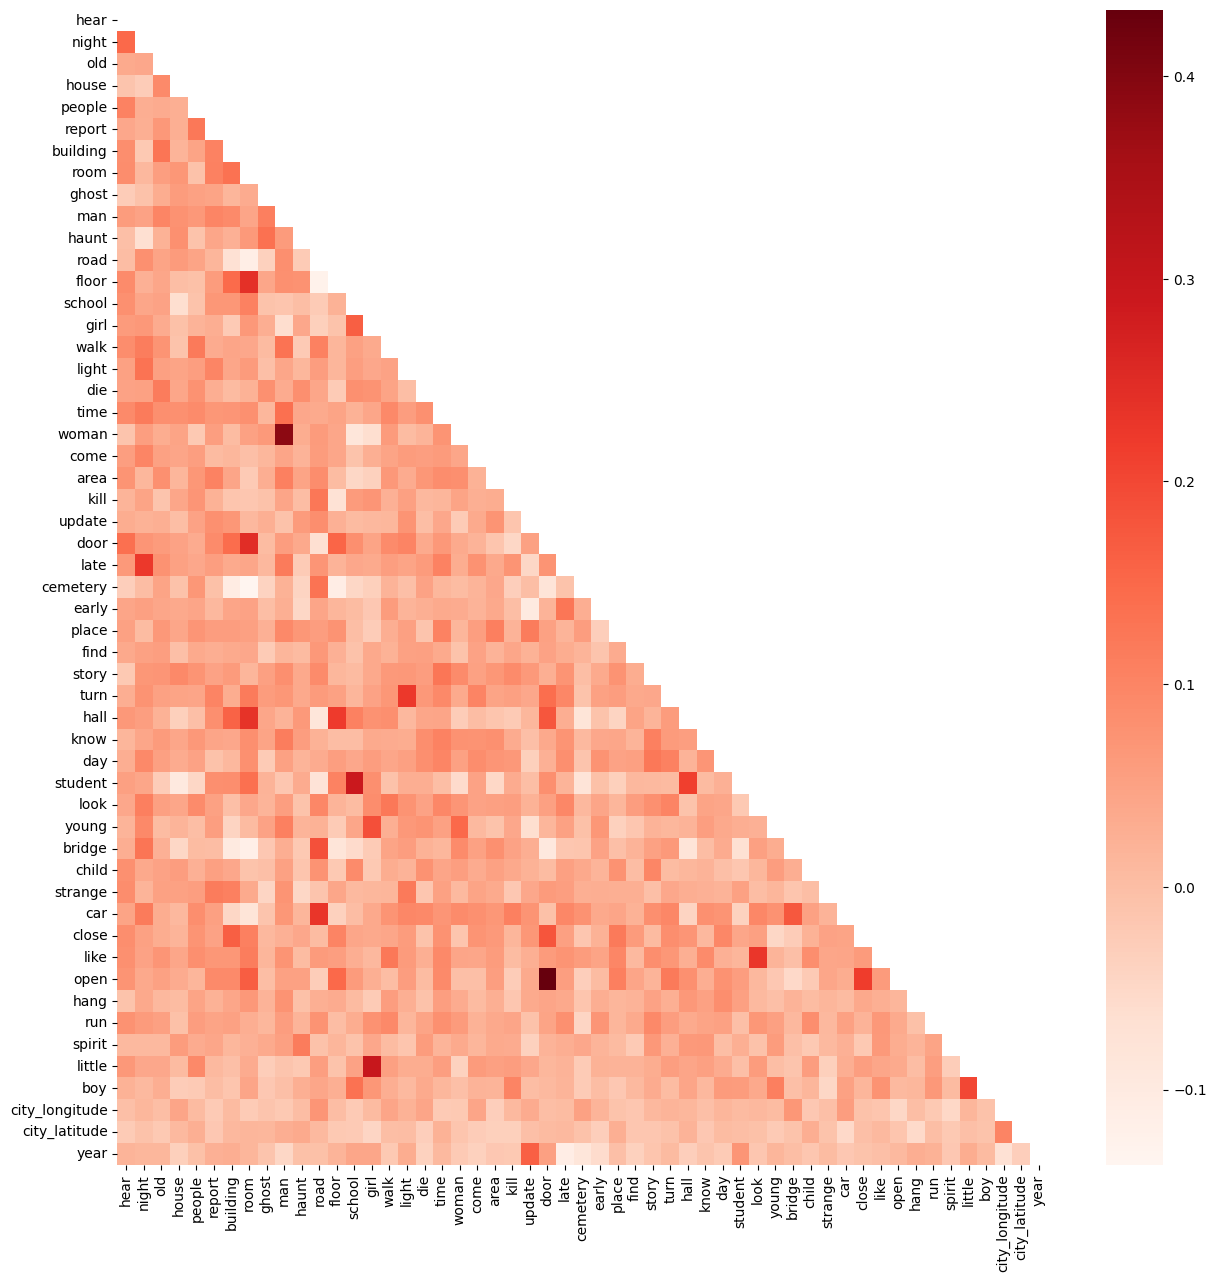

In [115]:
fig, axs = plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap="Reds", mask=np.triu(corr))
plt.show()

In [121]:
from sklearn.linear_model import LinearRegression
X=df_final.loc[:,list(df_tags.columns)+['city_longitude','city_latitude','year']]
y=df_final.iloc[:,-1]
reg=LinearRegression()
reg.fit(X,y)
reg.score(X,y)# this will not be good as it gives 100% efficiency which is not true

1.0

In [118]:
from sklearn.linear_model import LinearRegression
X=df_final.loc[:,list(df_tags.columns)+['city_longitude','city_latitude']]
y=df_final.iloc[:,-1]
reg=LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.07423096090754189

Parametric Machine Learing Model, we will know some of the behaviour of our data and the majority of our variables need to be continuous. Here we will use a non parametric moded , the example is a random forest which uses decision trees, it will give yes or no kind of results

In [119]:
from sklearn.ensemble import RandomForestRegressor
X=df_final.loc[:,list(df_tags.columns)+['city_longitude','city_latitude']]
y=df_final.iloc[:,-1]
reg=RandomForestRegressor()
reg.fit(X,y)
reg.score(X,y)


0.8587643192706632